In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [114]:
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
data.shape[0]

150

In [132]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal_area', 'petal_area'],
      dtype='object')

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [117]:
data.corr()

C:\Users\Marcin\AppData\Local\Temp\ipykernel_5604\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [118]:
data["sepal_area"] = data["sepal_length"] * data["sepal_width"]
data["petal_area"] = data["petal_length"] * data["petal_width"]

In [119]:
data.corr()

C:\Users\Marcin\AppData\Local\Temp\ipykernel_5604\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.683362,0.857326
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.645421,-0.280612
petal_length,0.871754,-0.420516,1.000000,0.962757,0.366584,0.958472
petal_width,0.817954,-0.356544,0.962757,1.000000,0.375365,0.980229
sepal_area,0.683362,0.645421,0.366584,0.375365,1.000000,0.459484
petal_area,0.857326,-0.280612,0.958472,0.980229,0.459484,1.000000


In [120]:
X = data.drop(columns="species")
y = data["species"]

In [121]:
X

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,17.85,0.28
1,4.9,3.0,1.4,0.2,14.70,0.28
2,4.7,3.2,1.3,0.2,15.04,0.26
3,4.6,3.1,1.5,0.2,14.26,0.30
4,5.0,3.6,1.4,0.2,18.00,0.28
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,20.10,11.96
146,6.3,2.5,5.0,1.9,15.75,9.50
147,6.5,3.0,5.2,2.0,19.50,10.40
148,6.2,3.4,5.4,2.3,21.08,12.42


In [122]:
species_encoding = {
    "Iris-setosa":0,
    "Iris-virginica" : 2,
    "Iris-versicolor" : 1
}

In [123]:
for s in species_encoding.keys():
    print(s)
    y.replace(s, species_encoding[s], inplace=True)

Iris-setosa
Iris-virginica
Iris-versicolor


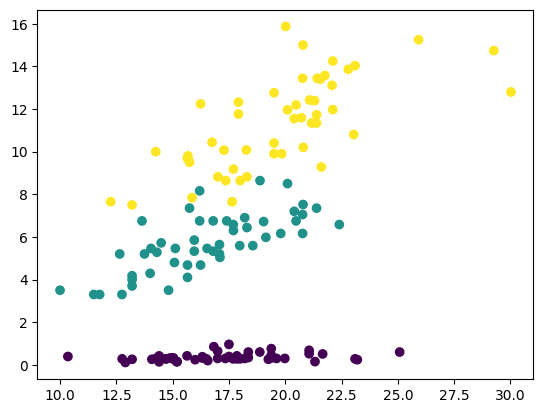

In [124]:
plt.scatter(X["sepal_area"], X["petal_area"], c=y)

Na powyższym widać że w dużej mierze możemy rozstrzygnąć rodzaj irysa na podstawie powierzchni płatka (petal area).

In [125]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [127]:
params = [ {'n_neighbors': [3,5,7], 'weights': ['uniform', 'distance'], 'p' : [1, 2] }]
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params)
clf.fit(X_train, y_train)
print(f"Best score: {clf.best_score_}")
print(f"Best params: {clf.best_params_}")

knn = KNeighborsClassifier(**clf.best_params_)
knn.fit(X_train, y_train)
print(f"Score of test data: {knn.score(X_test, y_test)}")

Best score: 0.9714285714285715
Best params: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Score of test data: 0.9555555555555556


In [128]:
log = LogisticRegression()
log.fit(X_train, y_train)
print(f"Score of test data: {log.score(X_test, y_test)}")

Score of test data: 0.9555555555555556


C:\venvs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
params = [ {'degree': [2,3,4], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma' : ['scale', 'auto'] }]
svc = SVC()
clf = GridSearchCV(svc, params)
clf.fit(X_train, y_train)
print(f"Best score: {clf.best_score_}")
print(f"Best params: {clf.best_params_}")

svc = SVC(**clf.best_params_)
svc.fit(X_train, y_train)
print(f"Score of test data: {knn.score(X_test, y_test)}")

Best score: 0.9714285714285715
Best params: {'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Score of test data: 0.9555555555555556


Wygląda więc na to, że SVC i KNN w tym przypadku zachowują się tak samo dobrze

Zapisanie modelu

In [131]:
import pickle
filename = 'knn_model.sav'
pickle.dump(knn, open(filename, 'wb'))
filename = 'svc_model.sav'
pickle.dump(svc, open(filename, 'wb'))

Sprawdzę jeszcze, czy występuje zmiana po pozbyciu się kolumny sepal_area

In [110]:
# X_train.drop(columns="sepal_area", inplace=True)
# X_test.drop(columns="sepal_area", inplace=True)

In [111]:
# params = [ {'n_neighbors': [3,5,7], 'weights': ['uniform', 'distance'], 'p' : [1, 2] }]
# knn = KNeighborsClassifier()
# clf = GridSearchCV(knn, params)
# clf.fit(X_train, y_train)
# print(f"Best score: {clf.best_score_}")
# print(f"Best params: {clf.best_params_}")

# knn = KNeighborsClassifier(**clf.best_params_)
# knn.fit(X_train, y_train)
# print(f"Score of test data: {knn.score(X_test, y_test)}")

Best score: 0.975
Best params: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Score of test data: 0.9333333333333333


In [112]:
# params = [ {'degree': [2,3,4], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma' : ['scale', 'auto'] }]
# svc = SVC()
# clf = GridSearchCV(svc, params)
# clf.fit(X_train, y_train)
# print(f"Best score: {clf.best_score_}")
# print(f"Best params: {clf.best_params_}")

# svc = SVC(**clf.best_params_)
# svc.fit(X_train, y_train)
# print(f"Score of test data: {knn.score(X_test, y_test)}")

Best score: 0.9833333333333334
Best params: {'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Score of test data: 0.9333333333333333


Okazuje się, że zmiana ta działa negatywnie na ostateczny wynik.